In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
df = pd.DataFrame(iris.data[50:], columns=iris.feature_names)

In [5]:
df['target'] = iris.target[50:]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,7.0,3.2,4.7,1.4,1
1,6.4,3.2,4.5,1.5,1
2,6.9,3.1,4.9,1.5,1
3,5.5,2.3,4.0,1.3,1
4,6.5,2.8,4.6,1.5,1


In [6]:
df.loc[df['target'] == 2, 'target'] = 0
df.target.unique()

array([1, 0])

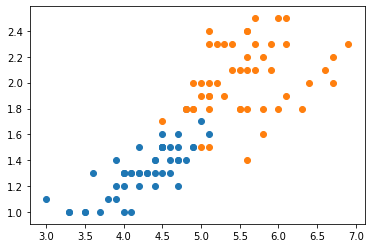

In [7]:
plt.scatter(df.loc[df['target'] == 1, 'petal length (cm)'], df.loc[df['target'] == 1, 'petal width (cm)'])
plt.scatter(df.loc[df['target'] == 0, 'petal length (cm)'], df.loc[df['target'] == 0, 'petal width (cm)'])

In [8]:
class logreg:
    def __init__(self, n_iters=1000, lr=0.001):
        self.n_iters = n_iters
        self.lr = lr
   
    def fit_simple_gradient(self, X, y):
        self.n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.intercept = 0
       
        #descent
        for i in range(self.n_iters):
            lin_model = np.dot(X, self.weights) + self.intercept
            y_predicted = self.sigmoid(lin_model)
           
            dw = (1/self.n_samples) * 2 * np.dot(X.T, (y_predicted - y))
            di = (1/self.n_samples) * 2 * np.sum(y_predicted - y)                            
          
            self.weights = self.weights - self.lr * dw
            self.intercept = self.intercept - self.lr * di
        
        return 'weights:', self.weights, 'interceptor:', self.intercept
       
    def predict(self, X):
        lin_model = np.dot(X, self.weights) + self.intercept
        self.y_predicted = self.sigmoid(lin_model)
        self.y_predicted_val = [1 if i >= 0.5 else 0 for i in self.y_predicted]        
        
        return self.y_predicted, self.y_predicted_val
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def mse(self, y_true):
        return np.mean((self.y_predicted_val - y_true)**2)
    
    #maximimum likelyhood estimation
    def mle(self, y):
        mle = 1
        for i in self.y_predicted_val:
            mle = (self.y_predicted[i])**(y[i])*((1-self.y_predicted[i])**(1-y[i])) * mle
        return mle

In [10]:
X = df.drop('target', axis=1)
y = df.target

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [12]:
model = logreg()

In [13]:
model.fit_simple_gradient(X_train, y_train)

('weights:',
 array([ 0.16165166,  0.12208701, -0.23408545, -0.20811645]),
 'interceptor:',
 0.07616928765543765)

In [14]:
model.predict(X_test)

(array([0.44791284, 0.44458585, 0.46229474, 0.4757112 , 0.42710001,
        0.54376696, 0.53129127, 0.42161403, 0.45811557, 0.44573894,
        0.43883951, 0.51588909, 0.44183884, 0.44324772, 0.43883951,
        0.54505517, 0.545878  , 0.51433188, 0.42669717, 0.52527496]),
 [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1])

In [15]:
model.mse(y_test)

0.05

In [16]:
model.mle(y_test.to_numpy())

7.218019508794368e-06